In [19]:
#My imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [20]:
#read in the data
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [21]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])

In [22]:
#Prediction vector
y = df['phot_g_mean_mag']

In [23]:
#Splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [24]:
#Check for and handle catagorical variables
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

In [25]:
#Instatiate our Random forest regression, with 10 trees (estimators) to be used in the forest, 0 random state, and an OOB score
Rfr = RandomForestRegressor(n_estimators=20, random_state=0, oob_score=True)

In [26]:
#fit the forest with the training data, and training output vector
Rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, oob_score=True, random_state=0)

In [27]:
#Predict the data
y_pred_test = Rfr.predict(X_test)
y_pred_train = Rfr.predict(X_train)

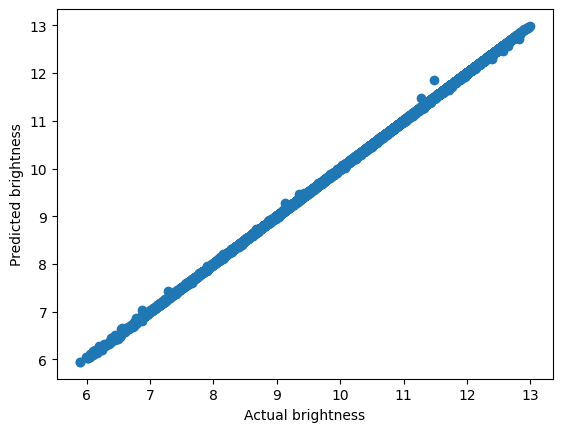

In [28]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

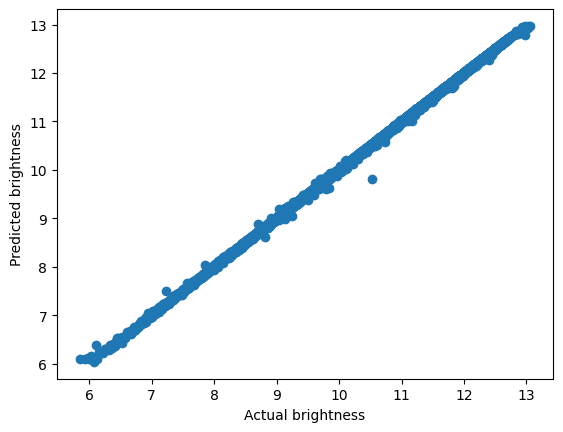

In [29]:
#Graph prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [31]:
#loss functions. We actually have our new lowest loss so far, even lower than the Decision tree regression
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE


0.0002870032245147918

In [36]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis
#This is one of the higest R^2 scores we currently have, and is so close to 1. This means this model works very well in prediction
#In theory, if we found the parameters of a star except brightness, we could predict it with 99.995% accuracy.

0.9999499270489411

In [35]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F
#Our F value is less than 1 and that of 32 DoF, with apha = 0.05. Once again, this means we can accept our null hypothesis

0.9996675548034768